In [1]:
from sklearn.datasets import fetch_mldata
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [2]:
mnist= fetch_mldata('MNIST original')
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [3]:
x, y= mnist['data'], mnist['target']

x_train, y_train, x_test, y_test= x[:60000], y[:60000], x[60000:], y[60000:]

In [4]:
random_digit= x_test[6550]

In [5]:
sgd_clf= SGDClassifier()

sgd_clf.fit(x_train, y_train)

sgd_clf.predict([random_digit])

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([6.])

In [6]:
random_digit_scores= sgd_clf.decision_function([random_digit])
random_digit_scores

array([[-713178.64433466, -618420.44759773, -140483.97249627,
        -531893.43113347,  -72209.83323022, -337395.96772898,
         238908.90027785, -479158.50649849, -434698.11976271,
        -570641.66624761]])

In [7]:
np.argmax(random_digit_scores)

6

In [8]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [9]:
ovo_clf= OneVsOneClassifier(SGDClassifier(random_state=123))
ovo_clf.fit(x_train, y_train)
ovo_clf.predict([random_digit])

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

array([6.])

In [10]:
len(ovo_clf.estimators_)

45

In [11]:
forest_clf= RandomForestClassifier()

forest_clf.fit(x_train, y_train)
forest_clf.predict([random_digit])

array([6.])

In [12]:
forest_clf.predict_proba([random_digit])

array([[0. , 0. , 0. , 0. , 0.2, 0. , 0.8, 0. , 0. , 0. ]])

In [13]:
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

array([0.84943011, 0.87469373, 0.8626794 ])

In [14]:
scaler= StandardScaler()
x_train_scaled= scaler.fit_transform((x_train.astype(np.float64)))
cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring='accuracy')

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

array([0.90746851, 0.90769538, 0.91253688])

In [15]:
y_train_pred= cross_val_predict(sgd_clf, x_train_scaled, y_train, cv=3)
conf_mat= confusion_matrix(y_train, y_train_pred)
conf_mat

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

array([[5724,    2,   25,   13,   10,   48,   48,    9,   40,    4],
       [   1, 6467,   40,   28,    7,   40,    9,   13,  126,   11],
       [  53,   36, 5341,   96,   78,   32,   97,   55,  154,   16],
       [  41,   39,  145, 5363,    4,  235,   38,   50,  118,   98],
       [  16,   23,   40,   10, 5346,    8,   62,   33,   90,  214],
       [  69,   36,   40,  194,   77, 4622,  108,   24,  159,   92],
       [  29,   23,   43,    3,   40,   94, 5639,    5,   42,    0],
       [  22,   23,   72,   36,   53,   10,    5, 5787,   16,  241],
       [  50,  154,   73,  166,   13,  170,   52,   26, 4999,  148],
       [  42,   31,   24,  100,  156,   28,    2,  194,   72, 5300]],
      dtype=int64)

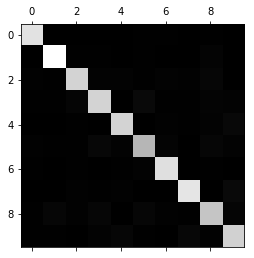

In [16]:
plt.matshow(conf_mat, cmap='gray')

In [17]:
row_sums= conf_mat.sum(axis=1, keepdims=True)
norm_conf_mat= conf_mat/row_sums

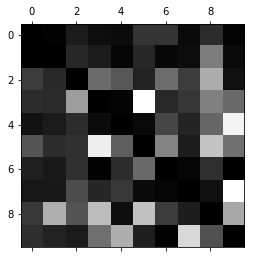

In [18]:
np.fill_diagonal(norm_conf_mat, 0)
plt.matshow(norm_conf_mat, cmap='gray')

# KNN

In [7]:
y_train_large= (y_train>= 7)
y_train_odd= (y_train % 2 == 1)
y_multilabel= np.c_[y_train_large, y_train_odd]

In [8]:
knn_clf= KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [9]:
knn_clf.predict([random_digit])

array([[False, False]])

In [ ]:
y_train_knn_pred= cross_val_predict(knn_clf, x_train, y_train, cv=3)

In [ ]:
f1_score(y_train, y_train_knn_pred, average='macro')

# Multioutput Classification

In [10]:
noise_train= np.random.randint(0,100, (len(x_train), 784))
noise_test= np.random.randint(0,100, (len(x_test), 784))
x_train_mod= x_train + noise_train
x_test_mod= x_test + noise_test
y_train_mod= x_train
y_test_mod= x_test

In [14]:
knn_clf.fit(x_train_mod, y_train_mod)
clean_digit = knn_clf.predict([x_test_mod[954]])

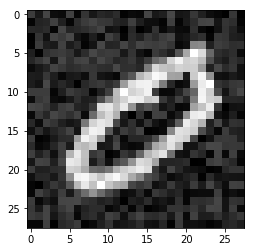

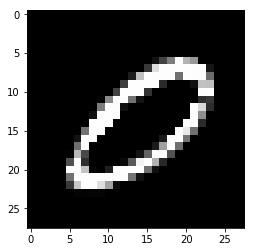

In [25]:
plt.imshow(x_test_mod[954].reshape([28,28]), cmap='gray')
plt.show()
plt.imshow(clean_digit.reshape([28,28]), cmap='gray')
plt.show()